# illustrates the use of the `proxy`, `analogs` and `scalar_plot` classes

In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
try:
    import xarray as xray 
except: 
    import xray
import matplotlib.pyplot as plt

### import the development version of paleopy

In [35]:
import sys

In [36]:
sys.path.insert(0, '../')

In [37]:
from paleopy import proxy 
from paleopy import analogs
from paleopy.plotting import scalar_plot

### example 1: defines one proxy

#### defines the folder where the JSON files are (for the datasets) and where to save the proxy JSON files

In [40]:
djsons = '../jsons/'
pjsons = '../jsons/proxies'

#### instantiates a proxy instance

In [41]:
p = proxy(sitename='Rarotonga', \
          lon = -159.82, \
          lat = -21.23, \
          djsons = djsons, \
          pjsons = pjsons, \
          pfname = 'Rarotonga.json', \
          dataset = 'ersst', \
          variable ='sst', \
          measurement ='delta O18', \
          dating_convention = 'absolute', \
          calendar = 'gregorian',\
          chronology = 'historic', \
          season = 'DJF', \
          value = 0.6, \
          calc_anoms = True, \
          detrend = True)

#### extract the time-series for the closest grid-point (dataset + variable, here `ersst` and `sst`)

In [42]:
p.extract_ts()

#### calculates the seasonal time-series

In [47]:
p.calculate_season??

In [44]:
p.find_analogs()

### now we can print the information about the proxy and the derived information related to the extraction

In [45]:
p.proxy_repr(pprint=True)

{
sitename:Rarotonga
proxy_type:None
measurement:delta O18
dating_convention:absolute
calendar:gregorian
chronology:historic
coords:(200.18, -21.23)
aspect:None
elevation:None
season:DJF
dataset:ersst
variable:sst
calc_anoms:True
detrend:True
value:0.6
climatology:(1981, 2010)
period:(1979, 2014)
extracted_coords:[200.0, -22.0]
distance_point:87.56368858840081
trend_params:{'slope': 0.030535947029886681, 'intercept': -60.96501637775517}
category:WA
analog_years:[1982, 1997, 1999, 2000, 2001, 2006, 2009]
}


### those are the extracted analog years

In [13]:
p.analog_years

array([1982, 1997, 1999, 2000, 2001, 2006, 2009], dtype=int32)

### `analogs` is an attribute of the proxy: it's a `pandas` dataframe containing info about the analog years 

In [14]:
p.analogs

,sst,anomalies,d_sst,d_anomalies,cat
time,,,,,
1982-02-15,26.849999,0.196222,27.308039,0.638992,WA
1997-02-15,27.416666,0.762889,27.416666,0.747619,WA
1999-02-15,27.466666,0.812889,27.405594,0.736547,WA
2000-02-15,27.373333,0.719556,27.281725,0.612678,WA
2001-02-15,27.356666,0.702889,27.234522,0.565475,WA
2006-02-15,27.373333,0.719556,27.098509,0.429462,WA
2009-02-15,27.539999,0.886222,27.173568,0.504521,WA


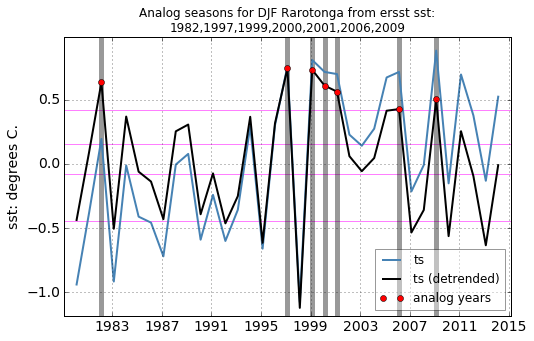

In [15]:
f = p.plot_season_ts()

### Adding `outfile=True` creates the json file containing the proxy information, with filename `self.pfname`

In [16]:
p.proxy_repr(pprint=True, outfile=True)

{
sitename:Rarotonga
proxy_type:None
measurement:delta O18
dating_convention:absolute
calendar:gregorian
chronology:historic
coords:(200.18, -21.23)
aspect:None
elevation:None
season:DJF
dataset:ersst
variable:sst
calc_anoms:True
detrend:True
value:0.6
climatology:(1981, 2010)
period:(1979, 2014)
extracted_coords:[200.0, -22.0]
distance_point:87.56368858840081
trend_params:{'slope': 0.030535947029886681, 'intercept': -60.96501637775517}
category:WA
analog_years:[1982, 1997, 1999, 2000, 2001, 2006, 2009]
}


In [17]:
!ls -lt ../jsons/proxies/Rarotonga.json

-rw-r--r--  1 nicolasf  staff  612 Apr  4 11:18 ../jsons/proxies/Rarotonga.json


### instantiate the analogs class with the proxy object and the dataset + variable to composite

In [18]:
compos = analogs(p, 'ncep', 'hgt_850').composite()

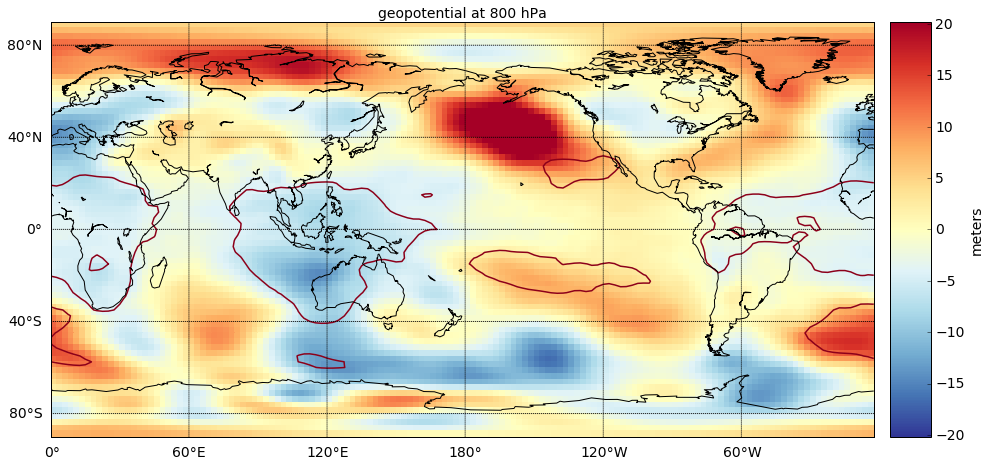

In [20]:
f = scalar_plot(compos, test=0.1, proj='cyl').plot(subplots=False)

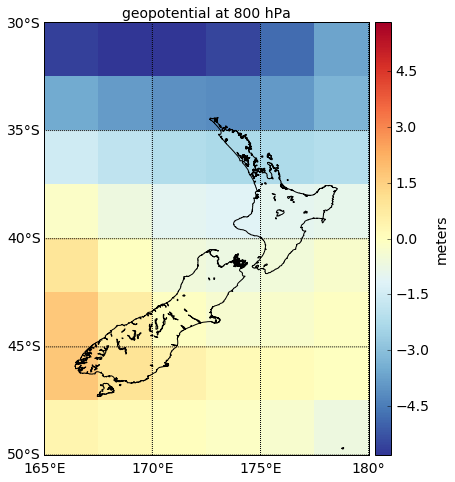

In [21]:
f = scalar_plot(compos, test=0.1, proj='cyl', domain=[165, 180, -50., -30], res='h').plot(subplots=False)

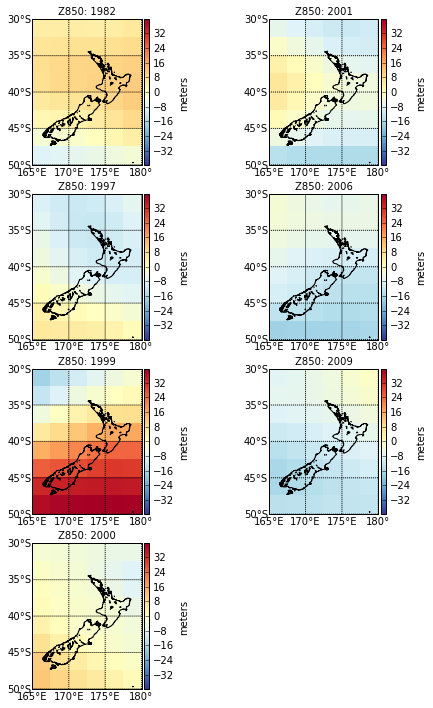

In [22]:
f = scalar_plot(compos, test=0.1, proj='cyl', domain=[165, 180, -50., -30], res='h').plot(subplots=True)

In [23]:
compos = analogs(p, 'ersst', 'sst').composite()

1 loop, best of 3: 3.64 s per loop


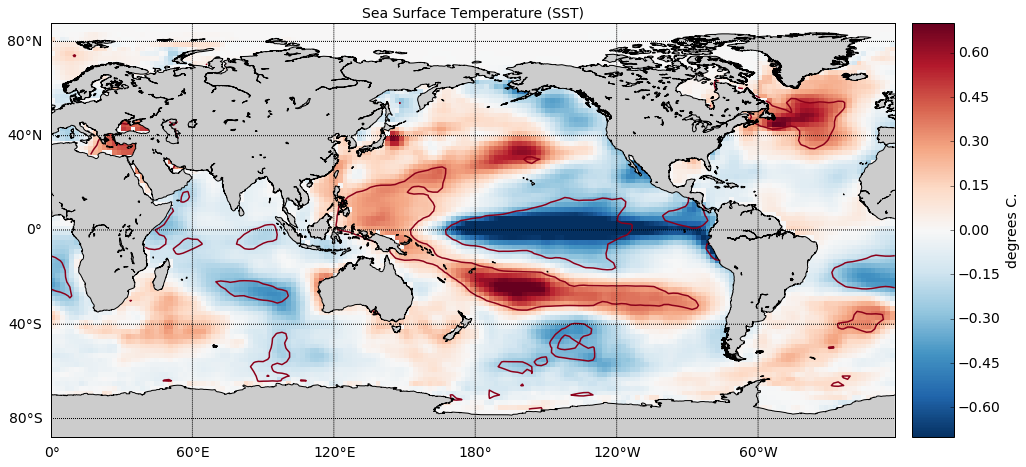

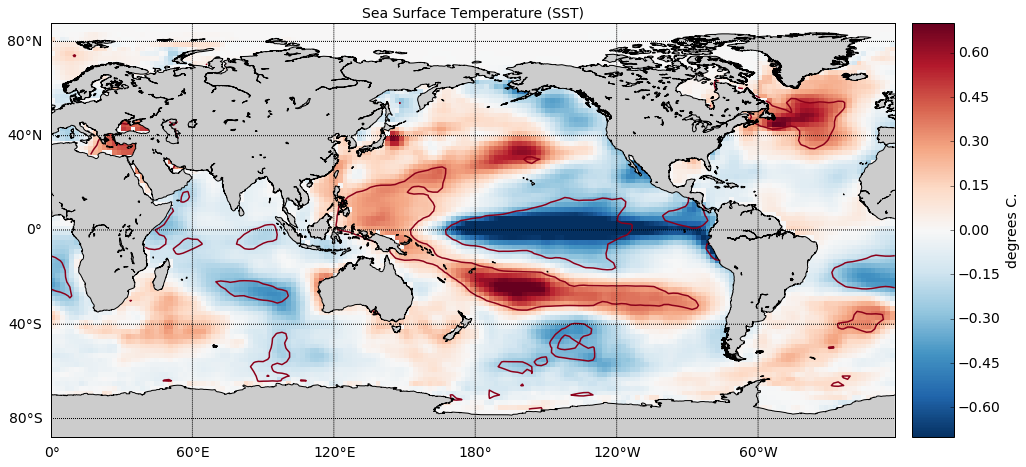

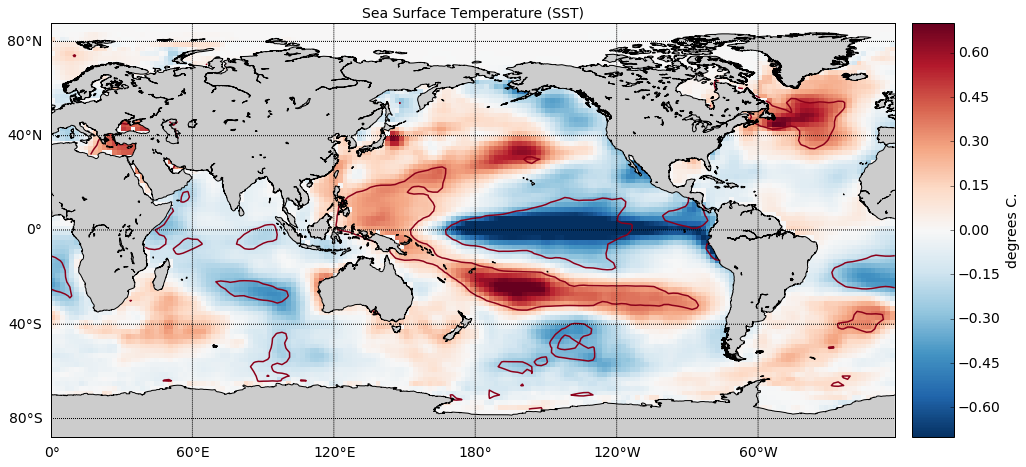

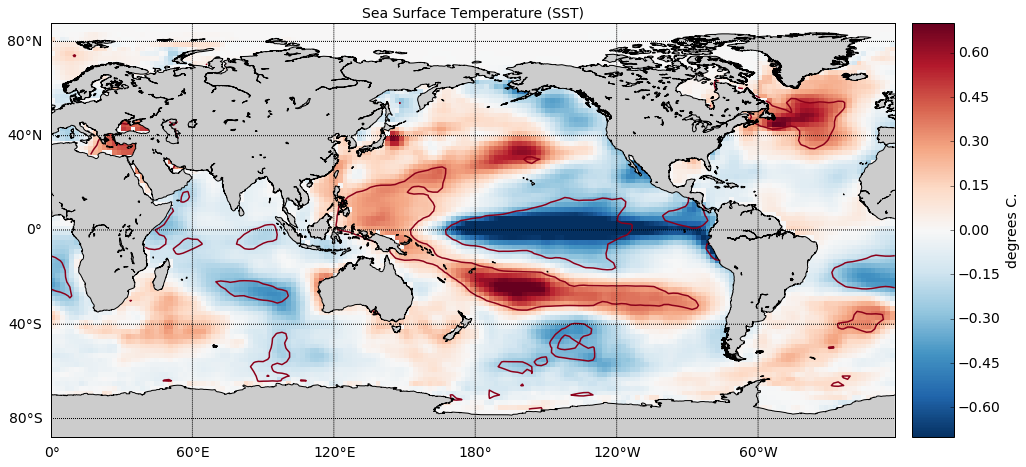

In [29]:
%%timeit
f = scalar_plot(compos, test=0.1, proj='cyl', res='l').plot(subplots=False)

1 loop, best of 3: 699 ms per loop


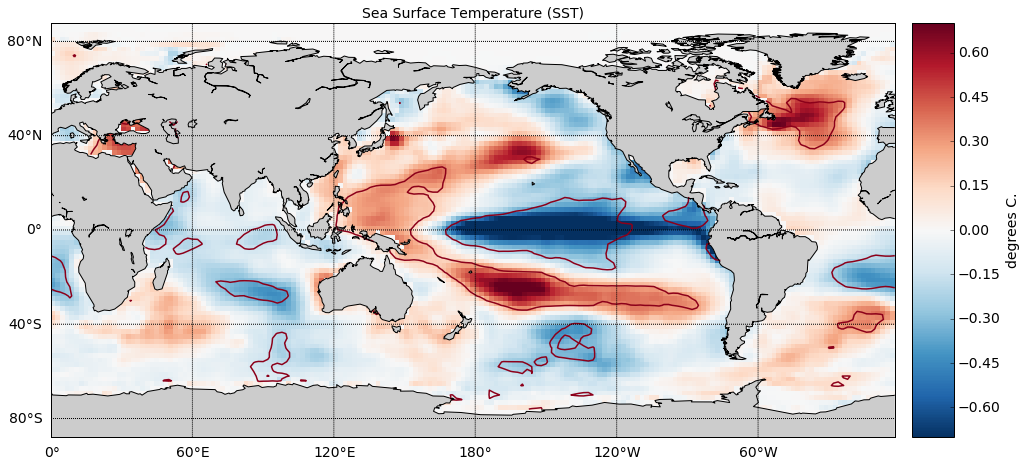

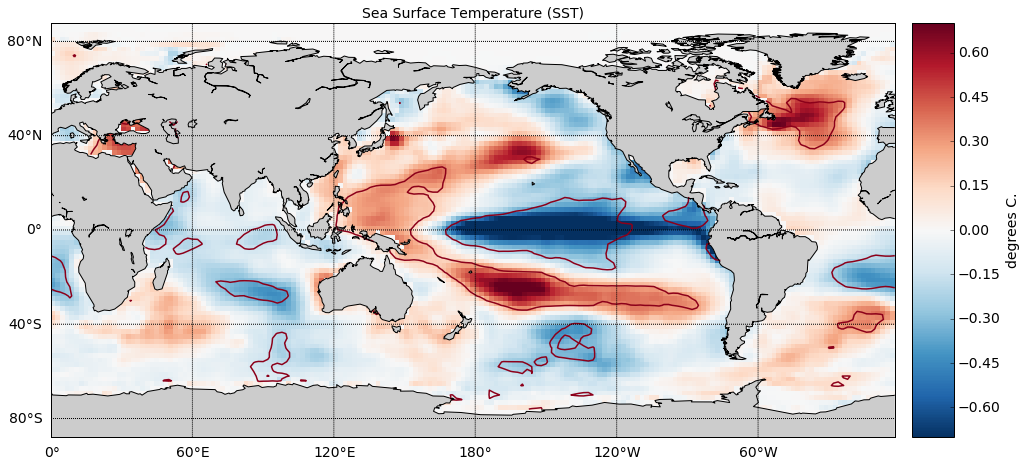

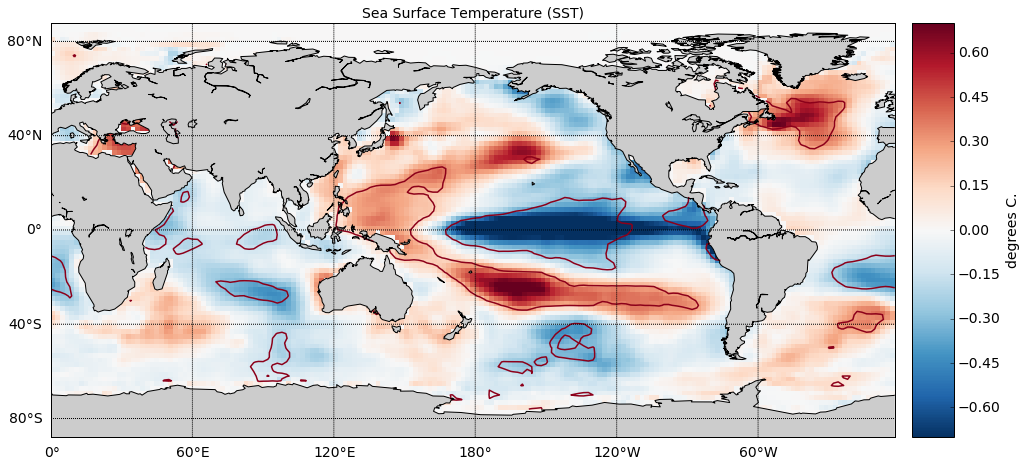

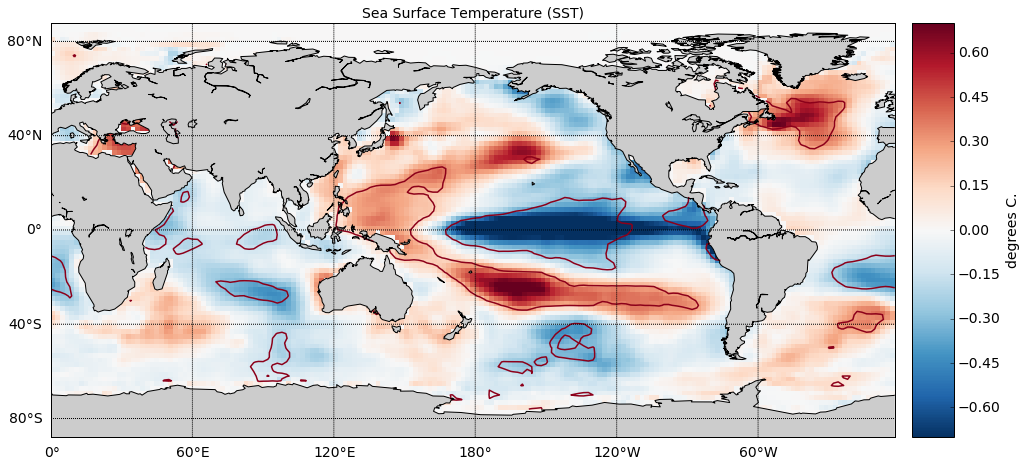

In [30]:
%%timeit
f = scalar_plot(compos, test=0.1, proj='cyl', res='c').plot(subplots=False)

In [31]:
ess = 

AttributeError: 'analogs' object has no attribute 'm'

In [33]:
compos.season

'DJF'